<a href="https://colab.research.google.com/github/AEIBIANCOFCE/AnalisisEstadisticoI/blob/main/6%20Introducci%C3%B3n%20Estad%C3%ADstica%20no%20param%C3%A9trica/8_AEI_Estad%C3%ADstica_No_Param%C3%A9trica_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<figure>
<center>
<img src='https://www.economicas.uba.ar/wp-content/uploads/2020/08/cropped-logo_FCE.png' />
</figure>

# **Universidad de Buenos Aires**
## **Facultad de Ciencias Económicas**

### **Análisis Estadístico I**

### Cátedra: Bianco

#### **Introducción a la estadística no paramétrica con Python**

***Material elaborado por la profesora Natalia Salaberry***

####**Librerías**

In [ ]:
import numpy as np

import pandas as pd

import scipy.stats as ss

####**Test de Bondad de Ajuste**

${\chi_{obs} =} {\sum_{i=1}^{k}{(F_i-E_i)^2 } \over {E_i}}$ $\sim \chi^2_{v}$

donde
- ${F_i}$ es el número de ocurrencias
- ${E_i}=n*p_i$ (n tamaño de muestra y $p_i$ probabilidades
- $v=k-r-1$ grados de libertad (con $k$ valor que toma X; $r$ cantidad de parámetros que tiene la distribución de probabilidad)

Hipótesis y Criterio de decisión para rechazar H0 (C.D)

\begin{equation}
\left\{
	       \begin{array}{cc}
		 H0: f(x) = Sigue\thinspace una \thinspace distribución \thinspace A     \\
		 H1: f(x) = No \thinspace Sigue\thinspace una \thinspace distribución \thinspace A           
	       \end{array}
 \thinspace C.D: si \thinspace \chi_{obs} > \chi^2_{v;1-\alpha} \thinspace ó \thinspace p-valor < \alpha \thinspace entonces \thinspace rechazo \thinspace H0
	     \right.
\end{equation}

#####**Ejemplo 1**



Se supone que la cantidad diaria de reclamos sigue una distribución de Poisson. Se tienen los siguientes datos:

\begin{equation}
\begin{array}{|c|c|}
    \hline
    Reclamos (k) & Días (F) \\
    \hline
    0 & 20 \\
    \hline
    1 & 62 \\
    \hline
    2 & 25 \\
    \hline
    3 & 12 \\
    \hline
    4 & 1 \\
    \hline
\end{array}
\end{equation}

Ponga a prueba lo supuesto sobre la distribución con $\alpha$=0.05

\begin{equation}
\left\{
	       \begin{array}{cc}
		 H0: f(x) = Sigue\thinspace una \thinspace distribución \thinspace Poisson     \\
		 H1: f(x) = No \thinspace Sigue\thinspace una \thinspace distribución \thinspace Poisson           
	       \end{array}
 \thinspace C.D: si \thinspace \chi_{obs} > \chi^2_{v;1-\alpha} \thinspace ó \thinspace p-valor < \alpha \thinspace entonces \thinspace rechazo \thinspace H0
	     \right.
\end{equation}

In [ ]:
#creamos un Dataframe con los datos

data=pd.DataFrame({'Reclamos':[0,1,2,3,4],'Dias':[20,62,25,12,1]})
data

,Reclamos,Dias
0,0,20
1,1,62
2,2,25
3,3,12
4,4,1


In [ ]:
#Se calcula lambda
L=sum(data.iloc[:,0]*data.iloc[:,1])/sum(data.iloc[:,1])

#Se calculan las probabilidades utilizando distribución de Poisson
probabilidades=[]
for k in data.iloc[:,0]:
  probabilidades.append(ss.poisson.pmf(k, L))

data['Probabilidades']=probabilidades

#se calcula Ei
data['E']=sum(data.iloc[:,1])*data.iloc[:,2]

#se calcula el estadístico observado
#Como todos los valores de la frecuencia son mayores a 5
chiobs=sum(((data.iloc[:,1]-data.iloc[:,3])**2/data.iloc[:,3]))

#se evalúa
alfa=0.05
v=5-1-1

chialfa  = round(ss.chi2.ppf(1-alfa, v),4)
if chiobs > chialfa:
  respuesta='Como se cumple C.D ya que ' + 'chiobs='+str(chiobs)+' es mayor que '+ 'Chi_1-alfa;n-1='+str(chialfa)+' entonces se rechaza H0'
else:
  respuesta='Como no se cumple C.D ya que ' + 'chiobs='+str(chiobs)+' es menor que '+ 'Chi_1-alfa;n-1='+str(chialfa)+' entonces no se rechaza H0'

p_valor=round(1-ss.chi2.cdf(chiobs, v),8)
if p_valor < alfa:
  respuesta1='Como se cumple C.D ya que ' + 'P-valor='+str(p_valor)+  ' es menor que '+ 'alfa='+ str(alfa)+' entonces se rechaza H0'
else:
  respuesta1='Como no se cumple C.D ya que ' + 'P-valor='+str(p_valor)+  ' es mayor que '+ 'alfa='+ str(alfa)+' entonces no se rechaza H0'

respuesta, respuesta1

('Como se cumple C.D ya que chiobs=16.318733095547405 es mayor que Chi_1-alfa;n-1=7.8147 entonces se rechaza H0',
 'Como se cumple C.D ya que P-valor=0.0009755 es menor que alfa=0.05 entonces se rechaza H0')

Por lo tanto es posible decir que la distribución de reclamos no sigue una distribución de Poisson con un 95% de confianza

#####**Ejemplo 2**

In [ ]:
#se carga librería
import yfinance as yf

In [ ]:
#se obtienen datos de la cotización de cierre de Google
Datos_GOOG = pd.DataFrame(yf.download('GOOGL', start='2024-01-1', end='2025-01-01')['Close']).reset_index()
Datos_GOOG

[*********************100%***********************]  1 of 1 completed


Ticker,Date,GOOGL
0,2024-01-02,137.670929
1,2024-01-03,138.418213
2,2024-01-04,135.897369
3,2024-01-05,135.239731
4,2024-01-08,138.338501
...,...,...
247,2024-12-24,196.110001
248,2024-12-26,195.600006
249,2024-12-27,192.759995
250,2024-12-30,191.240005


Evaluación descriptiva inicial

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

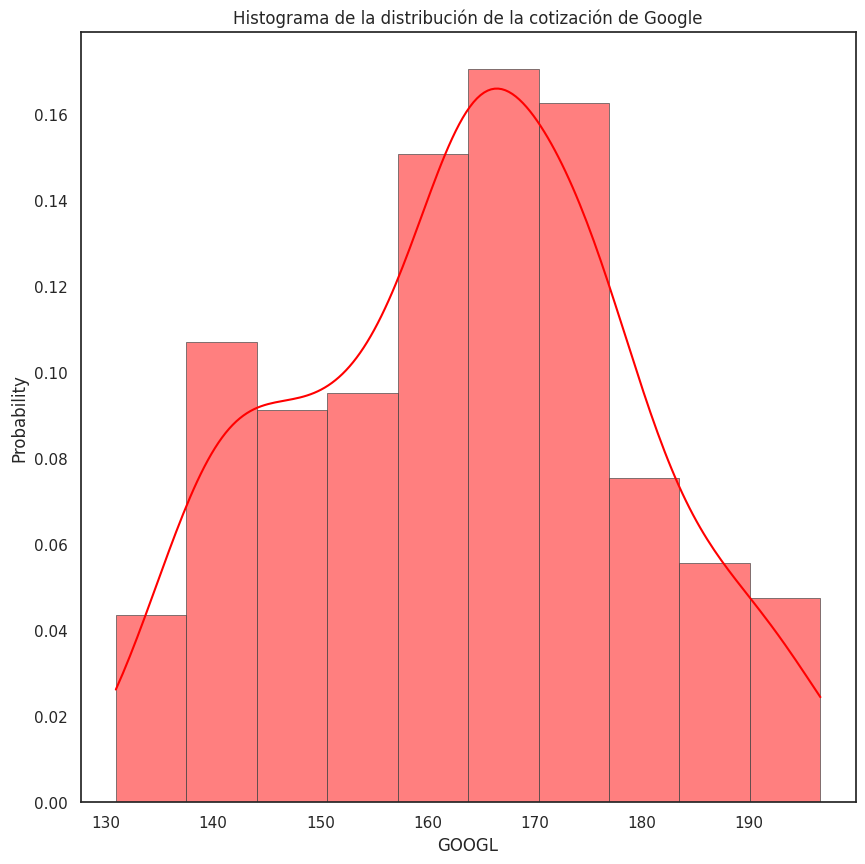

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.set_style(style='white')
sns.histplot(x=Datos_GOOG['GOOGL'], color="red",edgecolor=".3",linewidth=.5,stat='probability', bins=10,kde=True) #histograma con densidad
plt.title('Histograma de la distribución de la cotización de Google')
plt.show()

Podría tratarse de una distribución normal

Supongase que se quiere evaluar si la distribución de la cotización de cierre de Google se ajusta a una distribución normal

\begin{equation}
\left\{
	       \begin{array}{cc}
		 H0: f(x) = Sigue\thinspace una \thinspace distribución \thinspace Normal     \\
		 H1: f(x) = No \thinspace Sigue\thinspace una \thinspace distribución \thinspace Normal           
	       \end{array}
 \thinspace C.D: si \thinspace \chi_{obs} > \chi^2_{v;1-\alpha} \thinspace ó \thinspace p-valor < \alpha \thinspace entonces \thinspace rechazo \thinspace H0
	     \right.
\end{equation}

In [ ]:
#se crea una columna con la frecuencia observada de días
Datos_GOOG['Frecuencia'] = 1
Datos_GOOG

Ticker,Date,GOOGL,Frecuencia
0,2024-01-02,137.670929,1
1,2024-01-03,138.418213,1
2,2024-01-04,135.897369,1
3,2024-01-05,135.239731,1
4,2024-01-08,138.338501,1
...,...,...,...
247,2024-12-24,196.110001,1
248,2024-12-26,195.600006,1
249,2024-12-27,192.759995,1
250,2024-12-30,191.240005,1


In [ ]:
#Se calculan la media y el desvío
mu=Datos_GOOG['GOOGL'].mean()
sigma=Datos_GOOG['GOOGL'].std()

#Se calculan las probabilidades utilizando distribución de Poisson
probabilidades=[]
for k in Datos_GOOG.iloc[:,1]:
  probabilidades.append(ss.norm.cdf(k, mu, sigma))

Datos_GOOG['Probabilidades']=probabilidades

#se calcula Ei
Datos_GOOG['E']=sum(Datos_GOOG.iloc[:,2])*Datos_GOOG.iloc[:,3]

#se calcula el estadístico observado
#Como todos los valores de la frecuencia son menores a 5
chiobs=((sum(Datos_GOOG.iloc[:,2])-sum(Datos_GOOG.iloc[:,4]))**2/sum(Datos_GOOG.iloc[:,4]))

#se evalúa
alfa=0.05
v=len(Datos_GOOG)-1

chialfa  = round(ss.chi2.ppf(1-alfa, v),4)
if chiobs > chialfa:
  respuesta='Como se cumple C.D ya que ' + 'chiobs='+str(chiobs)+' es mayor que '+ 'Chi_1-alfa;n-1='+str(chialfa)+' entonces se rechaza H0'
else:
  respuesta='Como no se cumple C.D ya que ' + 'chiobs='+str(chiobs)+' es menor que '+ 'Chi_1-alfa;n-1='+str(chialfa)+' entonces no se rechaza H0'

p_valor=round(1-ss.chi2.cdf(chiobs, v),8)
if p_valor < alfa:
  respuesta1='Como se cumple C.D ya que ' + 'P-valor='+str(p_valor)+  ' es menor que '+ 'alfa='+ str(alfa)+' entonces se rechaza H0'
else:
  respuesta1='Como no se cumple C.D ya que ' + 'P-valor='+str(p_valor)+  ' es mayor que '+ 'alfa='+ str(alfa)+' entonces no se rechaza H0'

respuesta, respuesta1

('Como se cumple C.D ya que chiobs=31430.157315027842 es mayor que Chi_1-alfa;n-1=288.9551 entonces se rechaza H0',
 'Como se cumple C.D ya que P-valor=0.0 es menor que alfa=0.05 entonces se rechaza H0')

Por lo tanto es posible decir que la distribución de reclamos no sigue una distribución de Normal con un 95% de confianza

####**Test de independencia de atributos**

Dados dos atributos A y B, se observan las frecuencias absolutas $(n_{ij})$

El estadístico observado es:

${\chi_{obs} =} {\sum_{i=1}^{s}\sum_{j=1}^{r}{(n_{ij}-E_{ij})^2 } \over {E_{ij}}}$ $\sim \chi^2_{v}$

donde
- ${E_i}={{n_i*n_i}\over n}$
- $v=(s-1)*(r-1)$ con $r$ cantidad de filas; $s$ cantidad de columnas

Hipótesis y Criterio de decisión para rechazar H0 (C.D)

\begin{equation}
\left\{
	       \begin{array}{cc}
		 H0: Los\thinspace atributos \thinspace son\thinspace independientes     \\
		 H1: Los\thinspace atributos \thinspace no \thinspace son\thinspace independientes           
	       \end{array}
 \thinspace C.D: si \thinspace \chi_{obs} > \chi^2_{v;1-\alpha} \thinspace ó \thinspace p-valor < \alpha \thinspace entonces \thinspace rechazo \thinspace H0
	     \right.
\end{equation}

#####**Ejemplo**

Con el objetivo de dirigir eficientemente la inversión publicitaria para neutralizar a la competencia, una empresa productora de artículos de consumo masivo ha realizado una encuesta sobre la preferencia del público en distintas zonas, obteniendo los siguientes resultados:

\begin{equation}
\begin{array}{|c|c|}
    \hline
    Preferencias& Zona A &Zona B &Zona C &Zona D &Zona E \\
    \hline
    Empresa & 35 & 22 & 28 & 33 & 16\\
    \hline
    Competencia & 45 & 28 & 12 & 17 & 24\\
    \hline
\end{array}
\end{equation}

¿considera que existe suficiente evidencia para asegurar que las preferencias y las zonas están asociadas? utilice $\alpha$=0.05



\begin{equation}
\left\{
	       \begin{array}{cc}
		 H0: La\thinspace preferencia \thinspace y \thinspace la \thinspace zona \thinspace son\thinspace independientes     \\
		 H1: La\thinspace preferencia \thinspace y \thinspace la \thinspace zona \thinspace no\thinspace son\thinspace independientes           
	       \end{array}
 \thinspace C.D: si \thinspace \chi_{obs} > \chi^2_{v;1-\alpha} \thinspace ó \thinspace p-valor < \alpha \thinspace entonces \thinspace rechazo \thinspace H0
	     \right.
\end{equation}

In [ ]:
#creamos la tabla como DataFrame

tabla=pd.DataFrame({'Preferencias':['Empresa','Competencia'],'Zona A':[35,45],'Zona B':[22,28],'Zona C':[28,12],'Zona D':[33,17],'Zona E':[16,24]})
tabla.set_index('Preferencias', inplace=True)
tabla

,Zona A,Zona B,Zona C,Zona D,Zona E
Preferencias,,,,,
Empresa,35,22,28,33,16
Competencia,45,28,12,17,24


In [ ]:
#Cálculo del estadístico observado
cols=tabla.sum(0, numeric_only=True)
fil=tabla.sum(1, numeric_only=True)
valoresE=[]
for i in cols.values:
  for j in fil.values:
    valoresE.append(i*j/fil.values.sum())

lista_unica=[]
for i in tabla.columns:
  lista_unica.extend(tabla[i].values)

lista_multi=[]
for c,d in zip(lista_unica, valoresE):
  lista_multi.append((c-d)**2/d)

chiobs=sum(lista_multi)

#se evalúa
alfa=0.05
v=(tabla.shape[0]-1)*(tabla.shape[1]-1)

chialfa  = round(ss.chi2.ppf(1-alfa, v),4)
if chiobs > chialfa:
  respuesta='Como se cumple C.D ya que ' + 'chiobs='+str(chiobs)+' es mayor que '+ 'Chi_1-alfa;n-1='+str(chialfa)+' entonces se rechaza H0'
else:
  respuesta='Como no se cumple C.D ya que ' + 'chiobs='+str(chiobs)+' es menor que '+ 'Chi_1-alfa;n-1='+str(chialfa)+' entonces no se rechaza H0'

p_valor=round(1-ss.chi2.cdf(chiobs, v),8)
if p_valor < alfa:
  respuesta1='Como se cumple C.D ya que ' + 'P-valor='+str(p_valor)+  ' es menor que '+ 'alfa='+ str(alfa)+' entonces se rechaza H0'
else:
  respuesta1='Como no se cumple C.D ya que ' + 'P-valor='+str(p_valor)+  ' es mayor que '+ 'alfa='+ str(alfa)+' entonces no se rechaza H0'

respuesta, respuesta1

('Como se cumple C.D ya que chiobs=14.85791281686804 es mayor que Chi_1-alfa;n-1=9.4877 entonces se rechaza H0',
 'Como se cumple C.D ya que P-valor=0.00500517 es menor que alfa=0.05 entonces se rechaza H0')

Por lo tanto, los atributos No son independientes. Esto quiere decir que hay dependencia entre la preferencia y la zona.